In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
file=pd.read_csv('adult.csv')
file.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
file[file == '?']=np.nan

In [6]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
for col in ['workclass', 'occupation', 'native.country']:
    file[col].fillna(file[col].mode()[0], inplace=True)
 

In [8]:
file.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [9]:
X=file.drop(['income'],axis=1)
y=file['income']
X

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States


In [10]:
y

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
32556    <=50K
32557    <=50K
32558     >50K
32559    <=50K
32560    <=50K
Name: income, Length: 32561, dtype: object

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size= 0.3,random_state=0)
X_train

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
32098,40,State-gov,31627,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,20,United-States
25206,39,Local-gov,236391,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,38,United-States
23491,42,Private,194710,Some-college,10,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States
12367,27,Local-gov,273929,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,40,United-States
7054,38,Federal-gov,99527,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,90,Self-emp-not-inc,282095,Some-college,10,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States
19648,36,Private,279721,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States
9845,26,Private,51961,12th,8,Never-married,Sales,Other-relative,Black,Male,0,0,51,United-States
10799,44,Private,115323,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States


In [12]:
from sklearn import preprocessing
categories = ['age', 'workclass', 'fnlwgt', 'education', 'education.num', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week', 'native.country']
for feature in categories:
    le=preprocessing.LabelEncoder()
    X_train[feature]=le.fit_transform(X_train[feature])   
    X_test[feature]=le.fit_transform(X_test[feature])

In [13]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=pd.DataFrame(scaler.fit_transform(X_train),columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)


In [14]:
X_test

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,1.274600,-0.090641,-0.285476,-1.107252,-1.980744,2.255673,1.232533,1.591474,0.392980,-1.430470,-0.279697,-0.204746,-0.116538,0.097209
1,-1.437485,-0.090641,-0.427652,0.184396,-0.423425,0.926666,-0.278542,0.968753,0.392980,-1.430470,-0.279697,-0.204746,-1.273674,0.097209
2,-1.144286,-0.090641,-1.240791,1.217715,-0.034095,0.926666,0.225150,-0.276689,-3.141670,-1.430470,-0.279697,-0.204746,-0.529801,0.262317
3,-0.118092,-2.781760,-1.618861,-0.332263,1.133894,-0.402341,0.728841,-0.899410,0.392980,0.699071,-0.279697,-0.204746,-0.116538,0.097209
4,0.761503,-0.090641,-0.014572,0.442726,1.523223,-0.402341,1.232533,-0.899410,0.392980,0.699071,-0.279697,-0.204746,0.709988,0.097209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9764,-0.118092,1.703439,-1.713218,0.184396,-0.423425,-0.402341,-0.530388,-0.899410,0.392980,0.699071,-0.279697,-0.204746,0.709988,0.097209
9765,-0.924388,-0.090641,-0.978853,0.184396,-0.423425,-0.402341,1.232533,-0.899410,0.392980,0.699071,-0.279697,-0.204746,-0.116538,0.097209
9766,-0.997687,-0.090641,-1.043964,1.217715,-0.034095,0.926666,0.728841,0.968753,0.392980,0.699071,-0.279697,-0.204746,-0.116538,0.097209
9767,-0.337991,-0.090641,-1.102030,0.184396,-0.423425,0.926666,-0.026696,1.591474,-1.963453,-1.430470,-0.279697,-0.204746,0.544683,0.097209


In [15]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print('Logistic Regression accuracy score with all the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score with all the features: 0.8215


DecisionTreeClassifier accuracy score with all the features: 0.8196


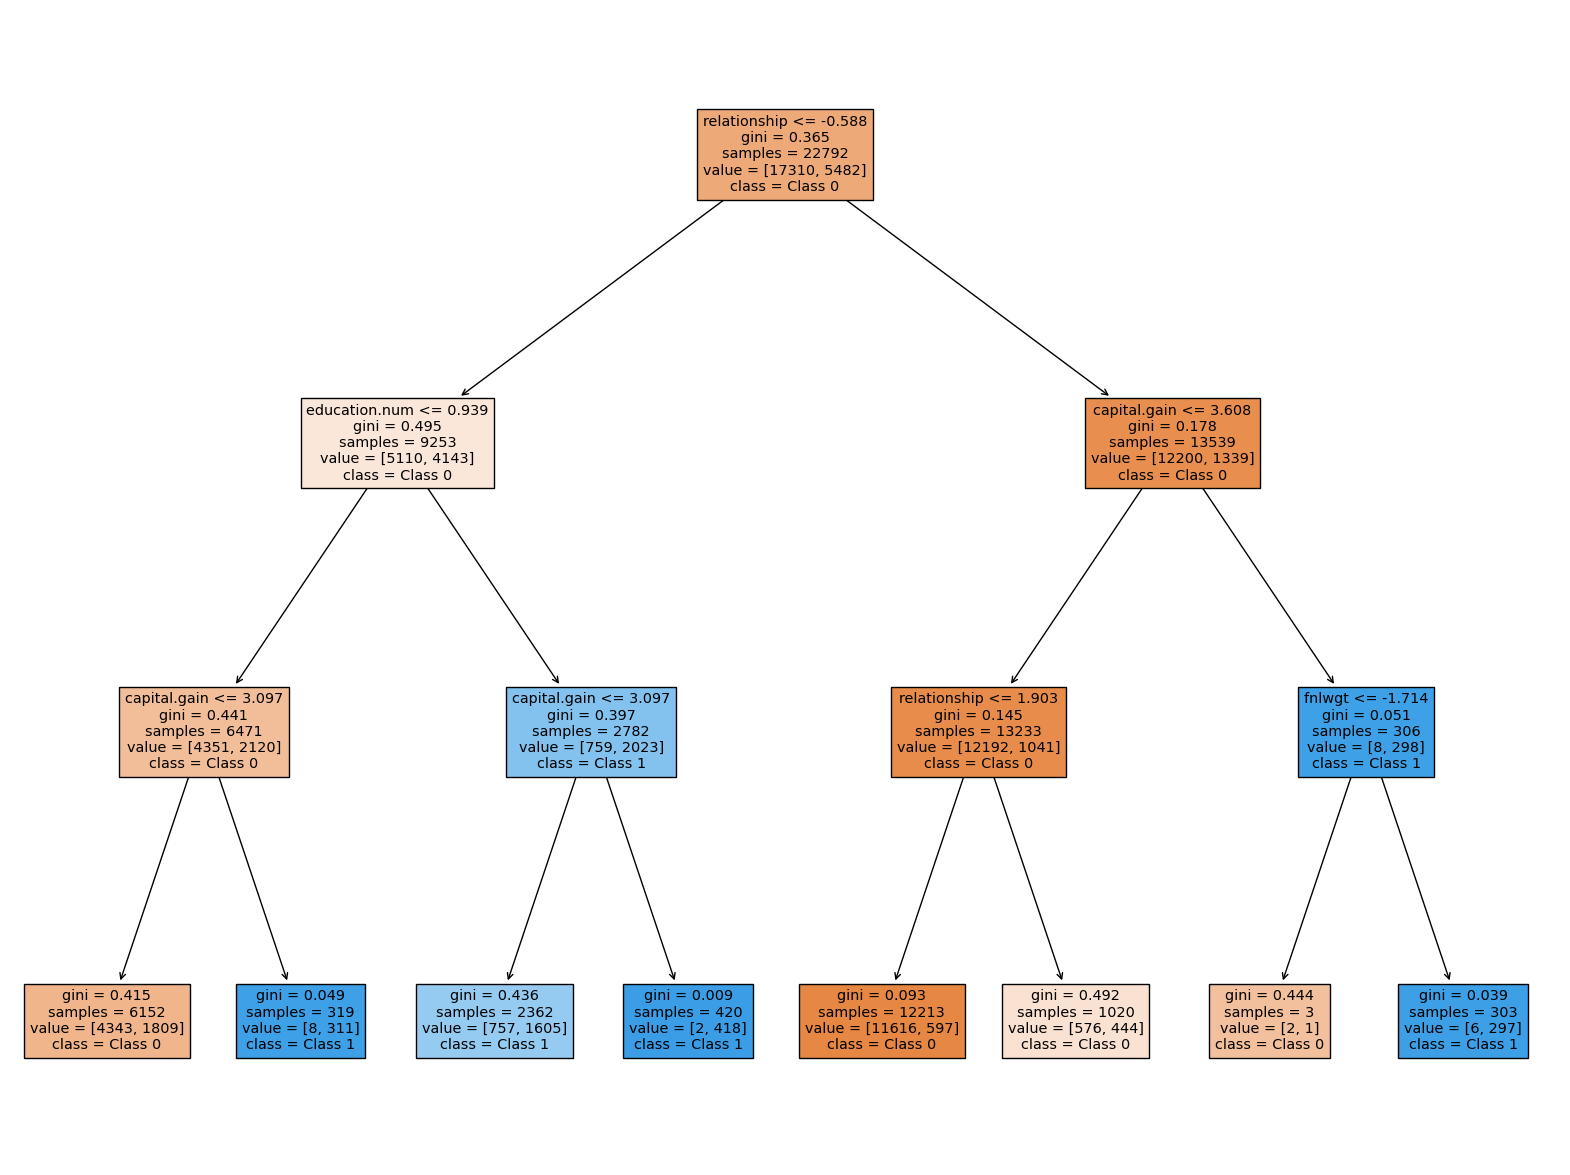

In [16]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Initialize the DecisionTreeClassifier with max_depth
dtc = DecisionTreeClassifier(max_depth=3)

# Fit the model
dtc.fit(X_train, y_train)
y_pred=dtc.predict(X_test)

print('DecisionTreeClassifier accuracy score with all the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
# Visualize the decision tree with increased figure size
plt.figure(figsize=(20, 15))
plot_tree(dtc, filled=True, feature_names=X_train.columns, class_names=["Class 0", "Class 1"])
plt.show()




In [17]:
 #left this 

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform the target variable
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Initialize the LogisticRegression model
logistic_reg = LogisticRegression()

# Perform k-fold cross-validation
# Here, we're using 5-fold cross-validation (k=5)
# You can adjust the value of k as needed
scores = cross_val_score(logistic_reg, X_train, y_train_encoded, cv=5, scoring='accuracy')

# Note: We're using 'accuracy' as the scoring metric for classification problems
# We'll take the mean of these scores to get the overall performance
mean_accuracy = scores.mean()

print("Mean Accuracy from cross-validation:", mean_accuracy)

# Now, let's train the model on the entire training set and evaluate on the test set
logistic_reg.fit(X_train, y_train_encoded)
y_prediction = logistic_reg.predict(X_test)

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test_encoded, y_prediction)
print("Test Accuracy:", test_accuracy)


Mean Accuracy from cross-validation: 0.8244558088331612
Test Accuracy: 0.8214760978605794


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Initialize the RandomForestClassifier model
random_forest = RandomForestClassifier()

# Perform k-fold cross-validation
# Here, we're using 5-fold cross-validation (k=5)
# You can adjust the value of k as needed
scores = cross_val_score(random_forest, X_train, y_train, cv=5, scoring='accuracy')

# Calculate the mean accuracy from cross-validation
mean_accuracy = scores.mean()

print("Mean Accuracy from cross-validation:", mean_accuracy)


Mean Accuracy from cross-validation: 0.8570989053760645


In [20]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Initialize the SVC model
svm_classifier = SVC()

# Perform k-fold cross-validation
# Here, we're using 5-fold cross-validation (k=5)
# You can adjust the value of k as needed
scores = cross_val_score(svm_classifier, X_train, y_train, cv=5, scoring='accuracy')

# Calculate the mean accuracy from cross-validation
mean_accuracy = scores.mean()

print("Mean Accuracy from cross-validation:", mean_accuracy)


Mean Accuracy from cross-validation: 0.8494207437352268


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Initialize the LogisticRegression model
logistic_reg = LogisticRegression()


scores = cross_val_score(logistic_reg, X_train, y_train, cv=5, scoring='accuracy')

# Calculate the mean accuracy from cross-validation
mean_accuracy = scores.mean()

print("Mean Accuracy from cross-validation:", mean_accuracy)


Mean Accuracy from cross-validation: 0.8244558088331612


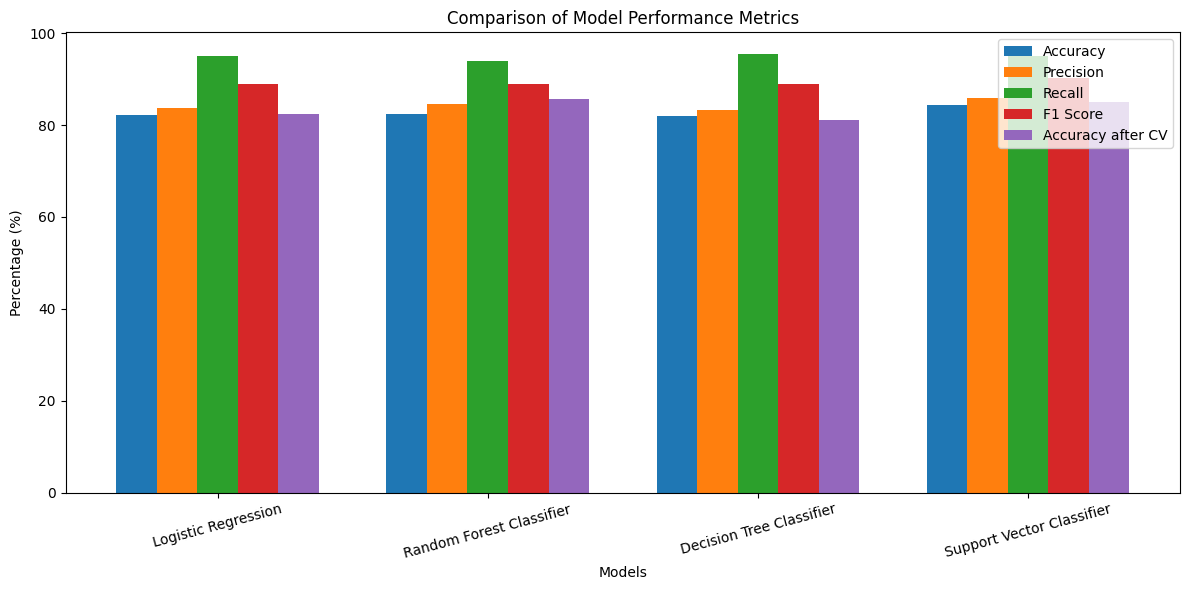

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the table
models = ['Logistic Regression', 'Random Forest Classifier', 'Decision Tree Classifier', 'Support Vector Classifier']
accuracy = [0.8215, 0.8245, 0.8199, 0.8447]
precision = [0.8368, 0.8463, 0.8328, 0.8594]
recall = [0.9499, 0.9393, 0.9541, 0.9509]
f1_score = [0.8898, 0.8904, 0.8894, 0.9028]
accuracy_cv = [0.8244, 0.8566, 0.8103, 0.8494]

# Convert values to percentages
accuracy = [x * 100 for x in accuracy]
precision = [x * 100 for x in precision]
recall = [x * 100 for x in recall]
f1_score = [x * 100 for x in f1_score]
accuracy_cv = [x * 100 for x in accuracy_cv]

# Plotting the histogram
bar_width = 0.15
index = np.arange(len(models))

plt.figure(figsize=(12, 6))

plt.bar(index, accuracy, bar_width, label='Accuracy')
plt.bar(index + bar_width, precision, bar_width, label='Precision')
plt.bar(index + 2 * bar_width, recall, bar_width, label='Recall')
plt.bar(index + 3 * bar_width, f1_score, bar_width, label='F1 Score')
plt.bar(index + 4 * bar_width, accuracy_cv, bar_width, label='Accuracy after CV')

plt.xlabel('Models')
plt.ylabel('Percentage (%)')
plt.title('Comparison of Model Performance Metrics')
plt.xticks(index + 2 * bar_width, models, rotation=15)
plt.legend()

plt.tight_layout()
plt.show()
